In [4]:
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import h5py
from os.path import isfile, join
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from bispectrumcode.python.scrappystuff.bispectrum_tricky import *
from sklearn.decomposition import PCA

In [5]:
def load_data(data_dir, num_frames=None, num_neurons=None):
    files = [f for f in os.listdir(data_dir) if isfile(join(data_dir, f)) and f[-3:]=='mat']
    spike_count = []
    stim = {}
    neuron = []
    for i, f in enumerate(files[:num_neurons]):
        loaded = h5py.File(data_dir+f,'r')
        num = f[3:6]
        spikes = np.array(loaded['psths']).tolist()[0][:num_frames]
        spike_count += [x for x in spikes]
        vid = np.array(loaded['rawStims'], dtype=np.float32)[:num_frames]
        vid = np.transpose(vid, axes=[0,2,1])
        stim[num] = vid
        neuron += [num] * len(vid)
    data = pd.DataFrame({'neuron': neuron, 'spike_count': spike_count})
    return data, stim

In [6]:
def show_stim(neuron, df, n_frames=100):
    
    def init():
        return (im,)
    
    def animate(frame):
        im.set_data(frame)
        return (im,)
    
    vid = stim[neuron][:n_frames]
    fig, ax = plt.subplots()
    im = ax.imshow(np.zeros(vid[0].shape), vmin=np.min(vid), vmax=np.max(vid), cmap='Greys_r');
    plt.axis('off')
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=vid, interval=12.5, blit=True)
    plt.close()
    return HTML(anim.to_html5_video())

In [7]:
def plot_spike_counts(neuron, data, num_frames=100):
    plt.bar(x=range(num_frames), height=data[data['neuron']=='058'].spike_count[:num_frames])

In [8]:
data_dir = 'data/mt-2/'

In [9]:
data, stim = load_data(data_dir, num_neurons=3, num_frames=100)

In [10]:
data.head()

,neuron,spike_count
0,058,0.0
1,058,0.0
2,058,0.0
3,058,0.0
4,058,0.0


In [11]:
data.neuron.unique()

array(['058', '140', '047'], dtype=object)

In [12]:
example_neuron = '058'

In [33]:
show_stim(example_neuron, stim)

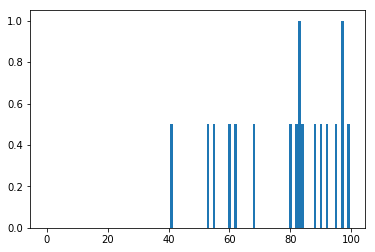

In [34]:
plot_spike_counts(example_neuron, data)

In [18]:
def compute_spectra(stim):
    fourier = {}
    bispec = {}
    pca = {}    
    for neuron in stim.keys():
        vid_fourier = np.zeros(stim[neuron].shape)
        vid_bispectrum = []
        vid_pca = []
        for i, img in enumerate(stim[neuron]):
            img_fourier = np.fft.fft2(img, img.shape)
            pca_mod = PCA(n_components=2) 
            pca_transform = pca_mod.fit_transform(img)
            vid_pca.append(pca_transform)
            vid_fourier[i] = img_fourier
            vid_bispectrum.append(bispectrum(img_fourier, truncated=True))
        fourier[neuron] = vid_fourier
        bispec[neuron] = vid_bispectrum
        pca[neuron]= vid_pca
    return fourier, bispec, pca 

In [19]:
ft, bs, pca = compute_spectra(stim)

/Users/Sophia/Software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
